In [1]:
from datasets import load_dataset

dataset = load_dataset("DBD-research-group/BirdSet", "POW", cache_dir="/home/lrauch/projects/birdMAE/data/POW", num_proc=1)

Using the latest cached version of the module from /home/lrauch/.cache/huggingface/modules/datasets_modules/datasets/DBD-research-group--BirdSet/94771b93c7499de19ae5eaa7b58dcc897703df28e3be7912fad8c4b961c0a666 (last modified on Wed Dec 11 13:23:33 2024) since it couldn't be found locally at DBD-research-group/BirdSet, or remotely on the Hugging Face Hub.


Extracting train split:   0%|          | 0/9 [00:00<?, ?it/s]

Extracting test split:   0%|          | 0/3 [00:00<?, ?it/s]

Extracting test_5s split:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating test_5s split: 0 examples [00:00, ? examples/s]

In [1]:
from birdset.datamodule.base_datamodule import DatasetConfig
from birdset.datamodule.pretrain_datamodule import PretrainDataModule
from datasets import load_from_disk

# initiate the data module
dm = PretrainDataModule(
    dataset= DatasetConfig(
        data_dir="/home/lrauch/projects/birdMAE/data/XCM", # specify your data directory!
        hf_path='DBD-research-group/BirdSet',
        hf_name='XCM',
        n_workers=3,
        val_split=None,
        task="multilabel",
        classlimit=500, #limit of samples per class 
        eventlimit=1, #limit of events that are extracted for each sample
        sampling_rate=32_000,
        seed=42
    ),
)

In [ ]:
dm.prepare_data()

In [ ]:
dm.disk_save_path

In [2]:
from birdset.datamodule.base_datamodule import DatasetConfig
from birdset.datamodule.birdset_datamodule import BirdSetDataModule
from datasets import load_from_disk

# initiate the data module
dm = BirdSetDataModule(
    dataset= DatasetConfig(
        data_dir="/home/lrauch/projects/birdMAE/data/HSN", # specify your data directory!
        hf_path='DBD-research-group/BirdSet',
        hf_name='HSN',
        n_workers=3,
        val_split=0.2,
        task="multilabel",
        classlimit=600, #limit of samples per class 
        eventlimit=5, #limit of events that are extracted for each sample
        sampling_rate=32_000,
    ),
)

In [ ]:
dm.prepare_data()

In [ ]:
dm.disk_save_path

In [4]:
ds = load_from_disk(dm.disk_save_path)

In [3]:
ds = load_from_disk("/home/lrauch/projects/birdMAE/data/HSN/HSN_processed_42_8fc39823e3ef9314")

In [5]:
ds["test"][0]

{'filepath': '/home/lrauch/projects/birdMAE/data/HSN/downloads/extracted/8fe105924444de149ea637824effad47e9f53435341a23d7f724cfac8c3a8aae/HSN_001_20150708_061805_000_005.ogg',
 'labels': array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'detected_events': None,
 'start_time': 0.0,
 'end_time': 5.0}

In [1]:
from datasets import load_from_disk

ds = load_from_disk("/home/lrauch/projects/birdMAE/data/XCM/XCM_processed_42_004252813e2e3003")

In [2]:
ds

DatasetDict({
    train: Dataset({
        features: ['filepath', 'labels', 'detected_events', 'start_time', 'end_time'],
        num_rows: 184565
    })
    valid: Dataset({
        features: ['filepath', 'labels', 'detected_events', 'start_time', 'end_time'],
        num_rows: 4560
    })
})

In [1]:
from birdset.datamodule.base_datamodule import DatasetConfig
from birdset.datamodule.birdset_datamodule import BirdSetDataModule
from datasets import load_from_disk

# initiate the data module
dm = BirdSetDataModule(
    dataset= DatasetConfig(
        data_dir="/home/lrauch/projects/birdMAE/data/HSN", # specify your data directory!
        hf_path='DBD-research-group/BirdSet',
        hf_name='HSN',
        n_workers=3,
        val_split=0.0001,
        task="multilabel",
        classlimit=600, #limit of samples per class 
        eventlimit=5, #limit of events that are extracted for each sample
        sampling_rate=32_000,
    ),
)

In [2]:
from birdset.datamodule.base_datamodule import DatasetConfig
from birdset.datamodule.birdset_datamodule import BirdSetDataModule
from datasets import load_from_disk

# initiate the data module
dm = BirdSetDataModule(
    dataset= DatasetConfig(
        data_dir="/home/lrauch/projects/birdMAE/data/POW", # specify your data directory!
        hf_path='DBD-research-group/BirdSet',
        hf_name='POW',
        n_workers=1,
        val_split=0.0001,
        task="multilabel",
        classlimit=600, #limit of samples per class 
        eventlimit=5, #limit of events that are extracted for each sample
        sampling_rate=32_000,
    ),
)

In [3]:
dm.prepare_data()

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Setting num_proc from 3 back to 1 for the test_5s split to disable multiprocessing as it only contains one shard.


Generating test_5s split: 0 examples [00:00, ? examples/s]

Train event mapping:   0%|          | 0/14911 [00:00<?, ? examples/s]

smart-sampling-1:   0%|          | 0/114114 [00:00<?, ? examples/s]

One-hot-encoding train labels.:   0%|          | 0/52185 [00:00<?, ? examples/s]

Using the latest cached version of the module from /home/lrauch/.cache/huggingface/modules/datasets_modules/datasets/DBD-research-group--BirdSet/9b65621c06a7a5f7a1a3cca77d81a84a22f3a82da31aa3b5617c6961ccfdcd92 (last modified on Mon Dec 30 17:19:35 2024) since it couldn't be found locally at DBD-research-group/BirdSet, or remotely on the Hugging Face Hub.
Using the latest cached version of the module from /home/lrauch/.cache/huggingface/modules/datasets_modules/datasets/DBD-research-group--BirdSet/9b65621c06a7a5f7a1a3cca77d81a84a22f3a82da31aa3b5617c6961ccfdcd92 (last modified on Mon Dec 30 17:19:35 2024) since it couldn't be found locally at DBD-research-group/BirdSet, or remotely on the Hugging Face Hub.
Using the latest cached version of the module from /home/lrauch/.cache/huggingface/modules/datasets_modules/datasets/DBD-research-group--BirdSet/9b65621c06a7a5f7a1a3cca77d81a84a22f3a82da31aa3b5617c6961ccfdcd92 (last modified on Mon Dec 30 17:19:35 2024) since it couldn't be found local

One-hot-encoding test_5s labels.:   0%|          | 0/4560 [00:00<?, ? examples/s]

Using the latest cached version of the module from /home/lrauch/.cache/huggingface/modules/datasets_modules/datasets/DBD-research-group--BirdSet/9b65621c06a7a5f7a1a3cca77d81a84a22f3a82da31aa3b5617c6961ccfdcd92 (last modified on Mon Dec 30 17:19:35 2024) since it couldn't be found locally at DBD-research-group/BirdSet, or remotely on the Hugging Face Hub.
Using the latest cached version of the module from /home/lrauch/.cache/huggingface/modules/datasets_modules/datasets/DBD-research-group--BirdSet/9b65621c06a7a5f7a1a3cca77d81a84a22f3a82da31aa3b5617c6961ccfdcd92 (last modified on Mon Dec 30 17:19:35 2024) since it couldn't be found locally at DBD-research-group/BirdSet, or remotely on the Hugging Face Hub.
Using the latest cached version of the module from /home/lrauch/.cache/huggingface/modules/datasets_modules/datasets/DBD-research-group--BirdSet/9b65621c06a7a5f7a1a3cca77d81a84a22f3a82da31aa3b5617c6961ccfdcd92 (last modified on Mon Dec 30 17:19:35 2024) since it couldn't be found local

Saving the dataset (0/1 shards):   0%|          | 0/52179 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/6 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/4560 [00:00<?, ? examples/s]

In [4]:
dm.disk_save_path

'/home/lrauch/projects/birdMAE/data/POW/POW_processed_42_38d2b8b85681b12a'

In [16]:
new_ds = load_from_disk("/home/lrauch/projects/birdMAE/data/HSN/HSN_processed_42_876267698be39955")

In [ ]:
new_ds["train"][0]

In [20]:
old_ds = load_from_disk('/home/lrauch/projects/birdMAE/data/HSN/HSN_processed_42_8fc39823e3ef9314')

In [ ]:
new_ds["train"][0]

In [ ]:
ds["train"][0]["labels"]

In [9]:
ds = load_from_disk('/home/lrauch/projects/birdMAE/data/HSN/HSN_processed_42_8fc39823e3ef9314')

In [ ]:
ds["train"][0]

In [ ]:
ds["train"][2000]

In [1]:
from datasets import load_dataset

dataset = load_dataset(
    "DBD-research-group/BirdSet", 
    "HSN", 
    cache_dir="/home/lrauch/projects/birdMAE/data/HSN", 
    num_proc=1, 
    revision="629b54c06874b6d2fa886e1c0d73146c975612d0"
)

In [ ]:
dataset["train"].features["ebird_code"].int2str(0)

In [ ]:
dataset["train"].features["ebird_code"]

In [ ]:
dataset["train"].features["ebird_code"].names

In [ ]:
from datasets import load_dataset, Audio

dataset = load_dataset("ashraq/esc50", cache_dir="/home/lrauch/projects/birdMAE/data/esc50")

In [6]:
dataset = dataset.cast_column(
    "audio", Audio(sampling_rate=32_000, decode=False)
)

In [9]:
dataset["train"][0]["audio"]["path"]


In [10]:
from datasets import load_from_disk


ds = load_from_disk("/home/lrauch/projects/birdMAE/data/HSN/HSN_processed_42_876267698be39955")

In [ ]:
ds["test"][0]

In [ ]:
from tqdm import tqdm 
# Iterate through the test dataset and modify labels
for i in tqdm(range(len(ds["test"]))):
    # Access the current sample
    sample = ds["test"][i]
    
    # Modify the labels array
    for index in [16, 11, 5, 15]:
        if sample['labels'][index] == 1:
            sample['labels'][index] = 0

    # Update the dataset with the modified sample
    ds["test"][i] = sample

In [ ]:
# Create a new list to hold modified samples
modified_samples = []

# Iterate through the test dataset and modify labels
for i in range(len(ds["test"])):
    # Access the current sample
    sample = ds["test"][i]
    
    # Modify the labels array
    for index in [16, 11, 5, 15]:
        if sample['labels'][index] == 1:
            print("got one")
            sample['labels'][index] = 0

    # Append the modified sample to the new list
    modified_samples.append(sample)

# Create a new dataset from the modified samples
from datasets import Dataset
modified_ds = Dataset.from_dict({
    'filepath': [s['filepath'] for s in modified_samples],
    'labels': [s['labels'] for s in modified_samples],
    'detected_events': [s['detected_events'] for s in modified_samples],
    'start_time': [s['start_time'] for s in modified_samples],
    'end_time': [s['end_time'] for s in modified_samples],
})

In [ ]:
len(modified_samples)

In [ ]:
modified_ds

In [19]:
ds["test"] = modified_ds

In [ ]:
ds.save_to_disk("/home/lrauch/projects/birdMAE/data/HSN/HSN_processed_42_876267698be39955_removesub5")

In [ ]:
from datasets import load_dataset

dataset = load_dataset("DBD-research-group/BirdSet", "HSN", trust_remote_code=True, cache_dir="/home/lrauch/projects/birdMAE/data/HSN_test2", num_proc=1)

In [1]:
from datasets import load_from_disk

ds = load_from_disk("/home/lrauch/projects/birdMAE/data/XCM/XCM_processed_42_004252813e2e3003")

In [2]:
ds

DatasetDict({
    train: Dataset({
        features: ['filepath', 'labels', 'detected_events', 'start_time', 'end_time'],
        num_rows: 184565
    })
    valid: Dataset({
        features: ['filepath', 'labels', 'detected_events', 'start_time', 'end_time'],
        num_rows: 4560
    })
})

In [2]:
from datasets import load_dataset

dataset = load_dataset("DBD-research-group/BirdSet", "UHH", cache_dir="/home/lrauch/projects/birdMAE/data/UHH", num_proc=1, trust_remote_code=True)

Extracting train split:   0%|          | 0/5 [00:00<?, ?it/s]

Extracting test split:   0%|          | 0/7 [00:00<?, ?it/s]

Extracting test_5s split:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating test_5s split: 0 examples [00:00, ? examples/s]

In [3]:
from birdset.datamodule.base_datamodule import DatasetConfig
from birdset.datamodule.birdset_datamodule import BirdSetDataModule
from datasets import load_from_disk

# initiate the data module
dm = BirdSetDataModule(
    dataset= DatasetConfig(
        data_dir="/home/lrauch/projects/birdMAE/data/POW", # specify your data directory!
        hf_path='DBD-research-group/BirdSet',
        hf_name='UHH',
        n_workers=1,
        val_split=0.0001,
        task="multilabel",
        classlimit=128, #limit of samples per class 
        eventlimit=2, #limit of events that are extracted for each sample
        sampling_rate=32_000,
    ),
)

In [4]:
dm.prepare_data()

Extracting train split:   0%|          | 0/5 [00:00<?, ?it/s]

Extracting test split:   0%|          | 0/7 [00:00<?, ?it/s]

Extracting test_5s split:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Setting num_proc from 3 back to 1 for the test_5s split to disable multiprocessing as it only contains one shard.


Generating test_5s split: 0 examples [00:00, ? examples/s]

Train event mapping:   0%|          | 0/3626 [00:00<?, ? examples/s]

smart-sampling-1:   0%|          | 0/21363 [00:00<?, ? examples/s]

One-hot-encoding train labels.:   0%|          | 0/6889 [00:00<?, ? examples/s]

One-hot-encoding test_5s labels.:   0%|          | 0/36637 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/6888 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/36637 [00:00<?, ? examples/s]

In [5]:
dm.disk_save_path

'/home/lrauch/projects/birdMAE/data/POW/UHH_processed_42_fd75f5d4aea1bda7'

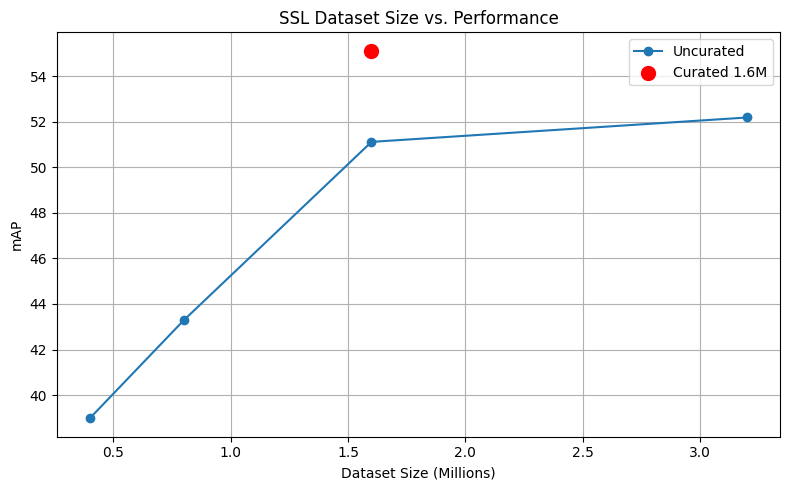

In [1]:
import matplotlib.pyplot as plt

# Data for uncurated samples
dataset_sizes = [0.4, 0.8, 1.6, 3.2]  # in millions
map_uncurated = [38.98, 43.28, 51.11, 52.18]

# Data for curated sample (only one point)
curated_size = 1.6  # in millions
map_curated = 55.11

plt.figure(figsize=(8, 5))

# Plot the uncurated data
plt.plot(dataset_sizes, map_uncurated, marker='o', linestyle='-', label='Uncurated')

# Plot the curated data as a distinct marker
plt.scatter(curated_size, map_curated, color='red', zorder=5, s=100, label='Curated 1.6M')

plt.xlabel('Dataset Size (Millions)')
plt.ylabel('mAP')
plt.title('SSL Dataset Size vs. Performance')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()